In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
data= pd.read_csv('cancer_rna/data.csv', index_col=0)
labels= pd.read_csv('cancer_rna/labels.csv', index_col=0)

In [6]:
data.head(3)

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0


In [7]:
labels.head(2)

,Class
sample_0,PRAD
sample_1,LUAD


In [9]:
scaler= StandardScaler()
X= scaler.fit_transform(data)

## Hyperparamater
## 1. no of cluster
## ELBOW METHOD

In [15]:
scores=[]
for k in range(1,10):
    model= KMeans(n_clusters=4, random_state=99)
    model.fit(X)

    scores.append(model.inertia_)
    del model

In [20]:

scores = []
K = range(1, 11)   # Try clusters from 1 to 10

for k in K:
    model = KMeans(n_clusters=k, random_state=99)
    model.fit(X)
    scores.append(model.inertia_)  # inertia = sum of squared distances
    del model

In [18]:
scores

[13196381.122679783,
 13196381.122679783,
 13196381.122679783,
 13196381.122679783,
 13196381.122679783,
 13196381.122679783,
 13196381.122679783,
 13196381.122679783,
 13196381.122679783]

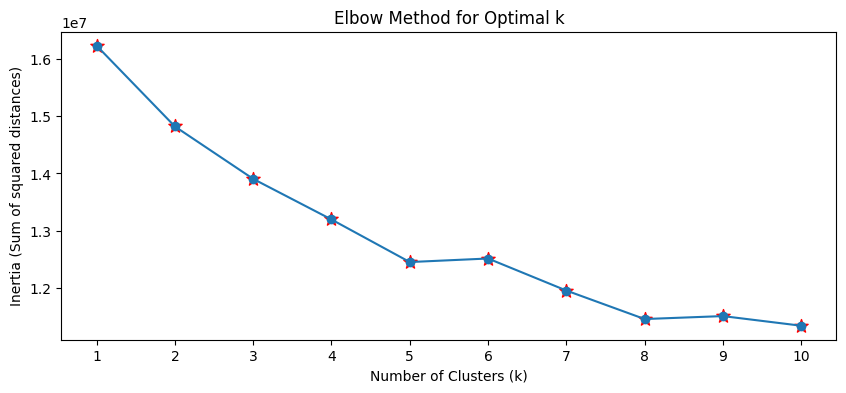

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(K, scores, marker='o')
plt.scatter(K, scores, s=100, c='red', marker='*')  # highlight points
plt.xticks(K)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of squared distances)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [ ]:
## KMeans Model

In [22]:
kmeans_model= KMeans(n_clusters=5, init= 'k-means++', random_state= 999)

In [23]:
kmeans_model.fit(X)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,999
,copy_x,True
,algorithm,'lloyd'


In [24]:
kmeans_model.inertia_

12197294.201629208

In [25]:
y_pred= kmeans_model.labels_

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
# Calculate silhouette coefficient
sil_score = silhouette_score(X, y_pred)
print("Silhouette Coefficient:", sil_score)

Silhouette Coefficient: 0.13507290311138614
